<a href="https://colab.research.google.com/github/Mi1kDev/CST3133_CW/blob/outlier_percentile/CST3133_CourseWork_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Coursework Part 1


Connecting the project to google drive for easy members access

In [68]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1.1 Dataset Selection and Problem Definition

-- clustering problem

-- database from kaggle link bellow

https://www.kaggle.com/code/mervanmunis/bank-transaction-for-fraud-detection-eda-ml



Importing core python libraries


*   pandas for dataset manipulation
*   numpy for mathematical processes
*   pyplot and seaborn for data visualization



In [69]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/drive/MyDrive/CST3133_CW/datasets/test.csv")
print(dataset.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

Display general information breakdown of the dataset

In [70]:
print(dataset.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


In [71]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## 1.1.2 Data Preprocessing

Handle missing values appropriately, as required.

Scale/normalize numerical features and encode categorical variable, as required.

Conduct logical feature selection or engineering, as required.

Checks for any missing values in the dataset

In [72]:
# Checking for missing values
missing_values = ["n/a", "na", "--"]
print(dataset.isnull().sum())
print(dataset.isnull().sum().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
0


Converts the datatype of the date object fields to actual datetype fields

In [73]:
#Converting dates to  datetime objects
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['PreviousTransactionDate'] = pd.to_datetime(dataset['PreviousTransactionDate'])

Normalize data columns using min-max feature scaling. Normalization is done to ensure that features operate on the same scale and consequently no feature is overvalued in its relevance due to being on a greater overall scale.

In [74]:
#Normalization of data using min-max feature scaling
def normalizeColumn(inputDS, columnName):
  normalizedName = "Normalized"+columnName
  inputDS[normalizedName] = (inputDS[columnName] - inputDS[columnName].min()) / (inputDS[columnName].max() - inputDS[columnName].min())

normalizeColumn(dataset, "TransactionAmount")
normalizeColumn(dataset, "AccountBalance")
normalizeColumn(dataset, "TransactionDuration")
normalizeColumn(dataset, "CustomerAge")
normalizeColumn(dataset, "LoginAttempts")

Encode categorical data values for use

In [75]:
from sklearn.preprocessing import OneHotEncoder

#Encoding categorical data

#Maps an hour as an integer to a time of day
def mapHour(h):
  if h >= 5 and h < 12:
    return "Morning"
  elif h >= 12 and h < 17:
    return "Afternoon"
  elif h >= 17 and h < 20:
    return "Evening"
  elif h >= 20 or h < 5:
    return "Night"
  else:
    return "NaN"

#encodes dates into two columns the day and the period of the day
def convertDate(ds, dateColumn, dayColumn, timeColumn):
  day = ds[dateColumn].dt.day_name()
  hour = ds[dateColumn].dt.hour
  hour = hour.map(mapHour)

  ds[dayColumn] = day
  ds[timeColumn] = hour

convertDate(dataset, 'TransactionDate', 'TransactionDateWeek', 'TransactionDateTimeOfDay')
convertDate(dataset, 'PreviousTransactionDate', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay')

#Hot Encode the categorical data
categoricalData = dataset[['Location', 'Channel', 'CustomerOccupation', 'TransactionType', 'TransactionDateWeek', 'TransactionDateTimeOfDay', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay']].columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
oneHotEncoded = encoder.fit_transform(dataset[categoricalData])
dataset['Hour'] = dataset['TransactionDate'].dt.hour
oneHotCategoricalData = pd.DataFrame(oneHotEncoded, columns=encoder.get_feature_names_out(categoricalData))

#Dataset with all values for model training

#feature selection for final values needed for clustering
strippedDataset = pd.concat([dataset[['NormalizedCustomerAge', 'NormalizedTransactionAmount', 'NormalizedAccountBalance', 'NormalizedTransactionDuration', 'NormalizedLoginAttempts']], oneHotCategoricalData[['Channel_ATM', 'Channel_Branch', 'Channel_Online', 'TransactionType_Debit', 'TransactionType_Credit']]], axis=1)




## 1.1.3 Exploratory Data Analysis

Create insightful visualizations, e.g., histograms and correlation heatmaps.

Identify and comment on trends, patterns, and potential biases in the data.

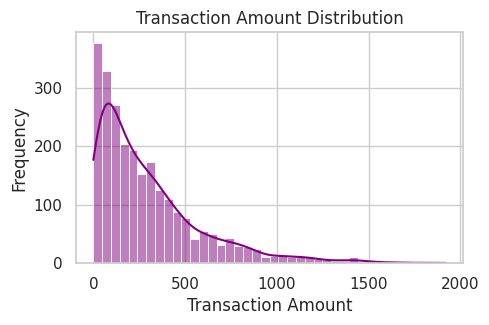

In [76]:
#Transaction Amount Diistribution

plt.figure(figsize = (5,3))
sns.histplot(dataset['TransactionAmount'], kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

From the transaction distribution graph we could observe we have low to high volume transatcions.

In our case the high volume transactions are rare, form this point we can consider to secure it for potential fraudulent transaction

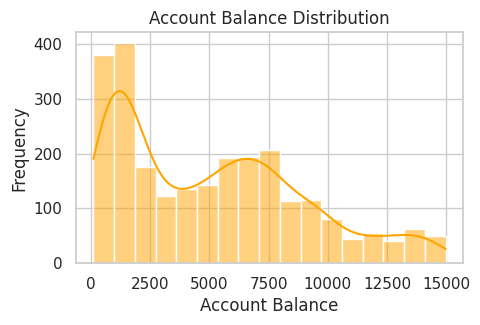

In [77]:
#Account Balance Distribution
plt.figure(figsize = (5,3))
sns.histplot(dataset['AccountBalance'], kde=True, color='orange')
plt.title('Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

The high amount of transaction as shown on the plot could carry risk in terms of low balances

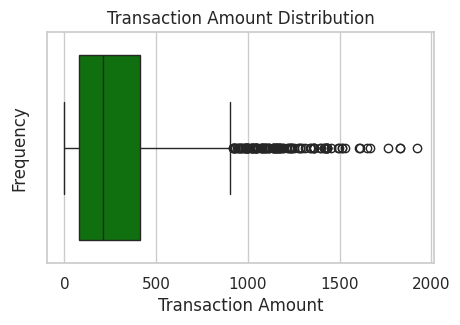

In [78]:
# Detecting outliers
plt.figure(figsize=(5,3))
sns.boxplot(x='TransactionAmount', data=dataset, color='green')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Outliers overview brough us the observation of abnormally high transactions, which are in fraud risk.

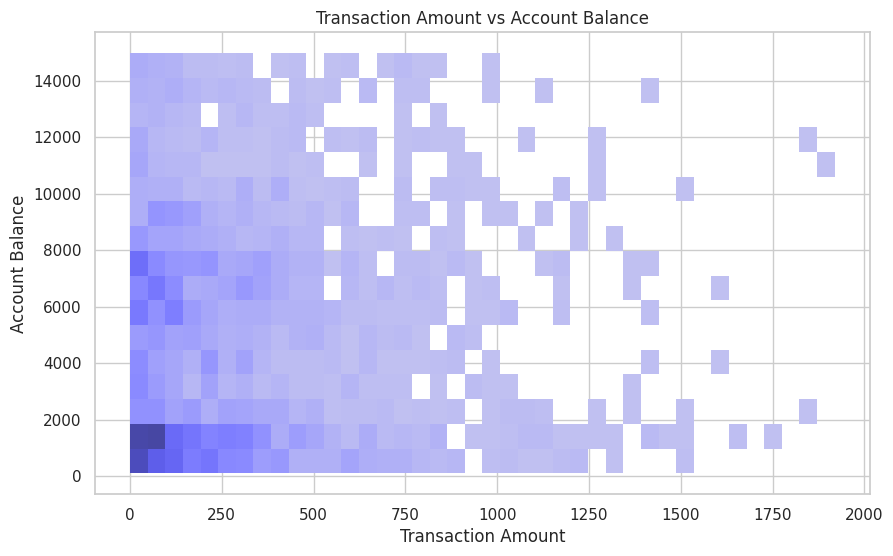

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(x=dataset['TransactionAmount'], y=dataset['AccountBalance'], kde=True, color = 'blue')
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

As presented the account balance is low and high amount transactions could vary of a potential risk, therefore we need to consider this and be extra carefull in terms of handaling those transcations.

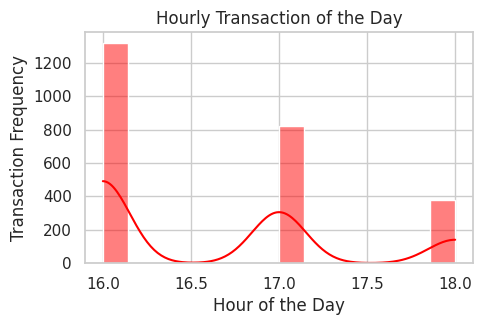

In [80]:
# Hourly Transaction of the Day
plt.figure(figsize=(5,3))
sns.histplot(dataset['Hour'], kde=True,color='red')
plt.title('Hourly Transaction of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Frequency')
plt.show()

The main transactions throughout the day are between 16:00-18:00, the high transactions are from 16:00 and slowwing down between 1&:00 and 18:00

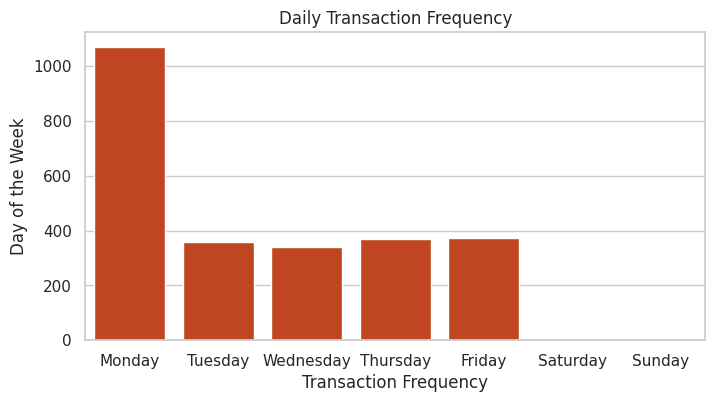

In [81]:
plt.figure(figsize=(8,4))
sns.countplot(data = dataset, x='TransactionDateWeek', order=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Day of the Week')
plt.show()

Transactions are shown the most during the week days, compare to the weekends where the decrease number of transactions may vary of abnormal behavior.

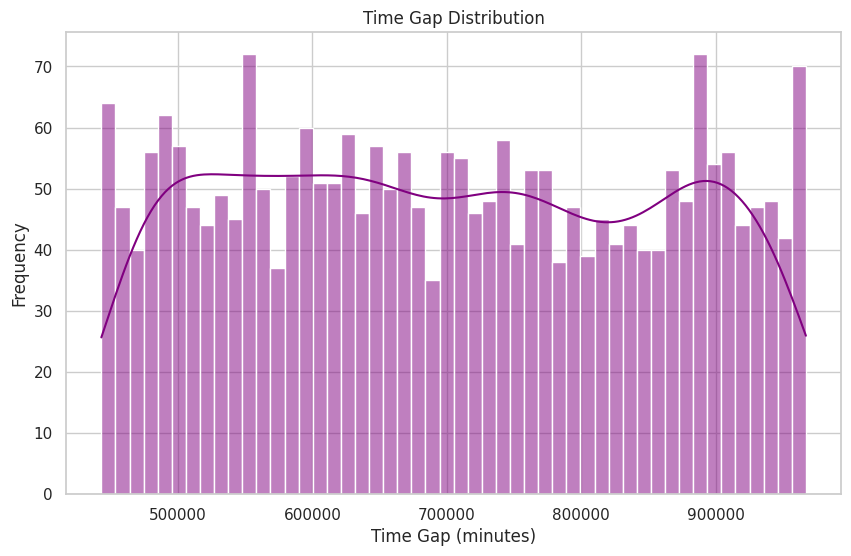

In [82]:
# Time Gap analysis for anonaly detection
dataset['TimeGap'] = -1 * (dataset['TransactionDate'] - dataset['PreviousTransactionDate']).dt.total_seconds() / 60

# plot the TimeGap
plt.figure(figsize=(10,6))
sns.histplot(dataset['TimeGap'], kde=True, bins=50, color='purple')
plt.title('Time Gap Distribution')
plt.xlabel('Time Gap (minutes)')
plt.ylabel('Frequency')
plt.show()

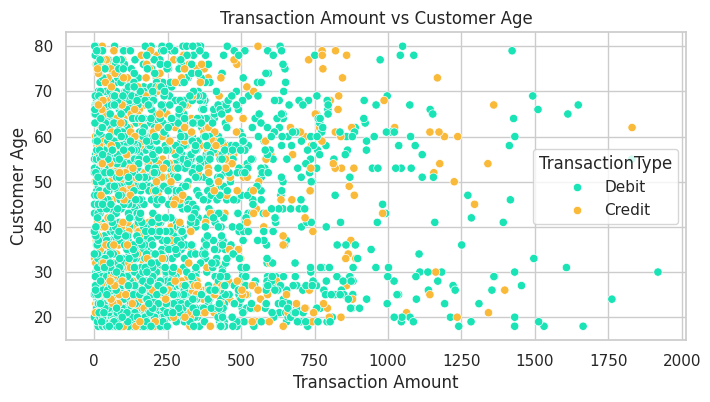

In [83]:
# Tranasaction Amount vs Customer Age Analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x='TransactionAmount', y='CustomerAge', data=dataset, hue='TransactionType', palette='turbo')
plt.title('Transaction Amount vs Customer Age')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.show()

The plot above shows how the transaction amount varies based on the customer age.

We may determinate if there are any patterns or unusual behaviors of how people of different ages spend money by examining the plot.

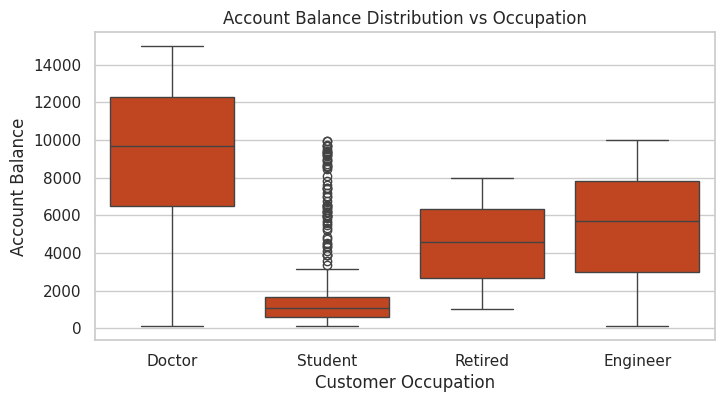

In [84]:
# Account Balance vs Occupation Analysis
plt.figure(figsize=(8,4))
sns.boxplot(x='CustomerOccupation', y='AccountBalance', data=dataset)
plt.title('Account Balance Distribution vs Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Account Balance')
plt.show()

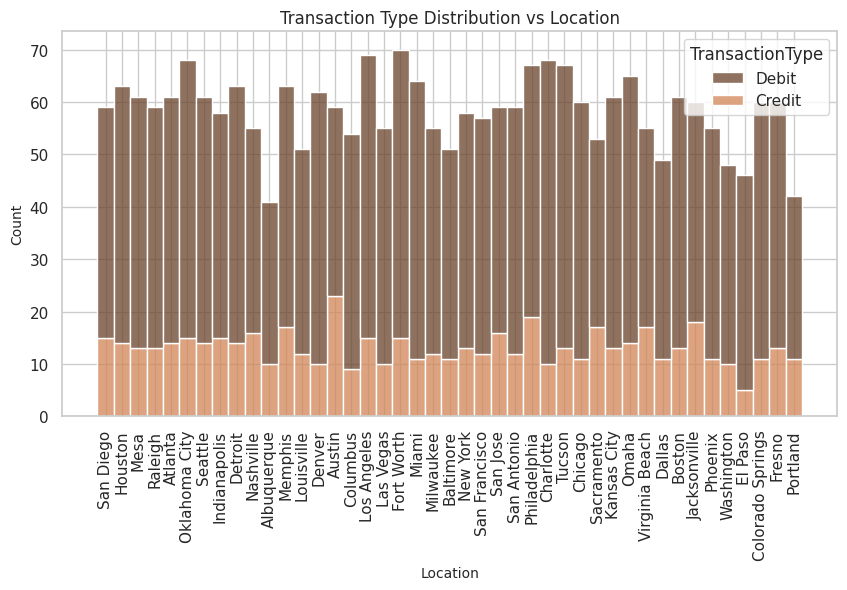

In [85]:
# Analysing Transaction Type Distribution vs Location
plt.figure(figsize=(10,5))
sns.histplot(x='Location', data=dataset, hue='TransactionType', multiple='stack', palette='copper')
plt.title('Transaction Type Distribution vs Location')
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

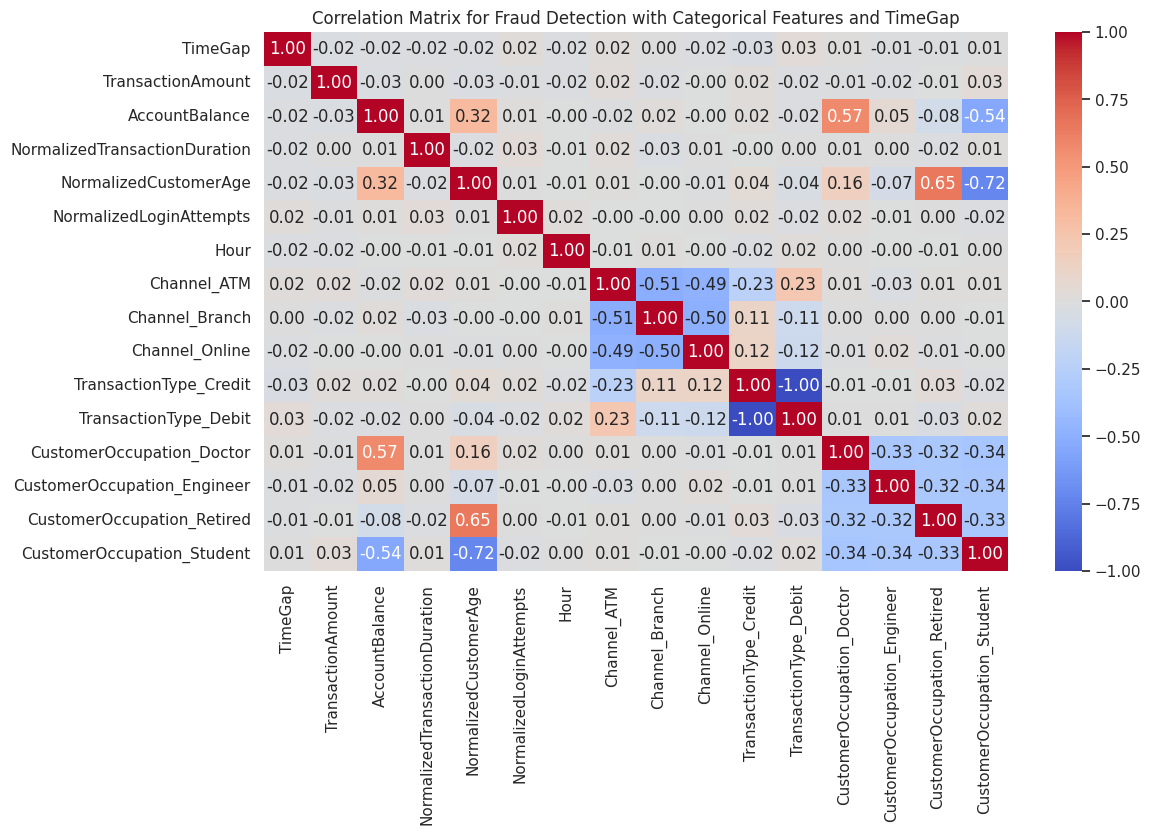

In [86]:
# Correlation Heatmaps implementation
# Selecting features for correlation analysis
features_for_correlation = ['TransactionAmount','AccountBalance', 'NormalizedCustomerAge', 'NormalizedTransactionDuration', 'NormalizedLoginAttempts', 'Hour', 'Channel', 'TransactionType', 'CustomerOccupation', 'TimeGap']
data_for_correlation = dataset[features_for_correlation]

#One hot encoding for categorical data
categorical_features = ['Channel', 'TransactionType', 'CustomerOccupation']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data_for_correlation[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

#combine the encoded features with numerical
numerical_features = ['TimeGap', 'TransactionAmount', 'AccountBalance', 'NormalizedTransactionDuration', 'NormalizedCustomerAge', 'NormalizedLoginAttempts', 'Hour']
data_for_correlation = pd.concat([data_for_correlation[numerical_features], encoded_df], axis=1)

# Calculating the correlation matrix
corr_matrix = data_for_correlation.corr()

# Plotting the heatmap
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Fraud Detection with Categorical Features and TimeGap')
plt.yticks(rotation=0)
plt.show()

The correlation heatmap illustrates the interrelationships among features in a dataset, employing a color gradient to indicate the strength and nature of these correlations.

Warm colors signify positive correlations, while cool colors denote negative correlations, and neutral colors indicate weak or absent relationships.

This visualization serves as a valuable tool for data analysts to detect trends, enhance feature selection, comprehend model interactions, and ultimately extract actionable insights from the data.

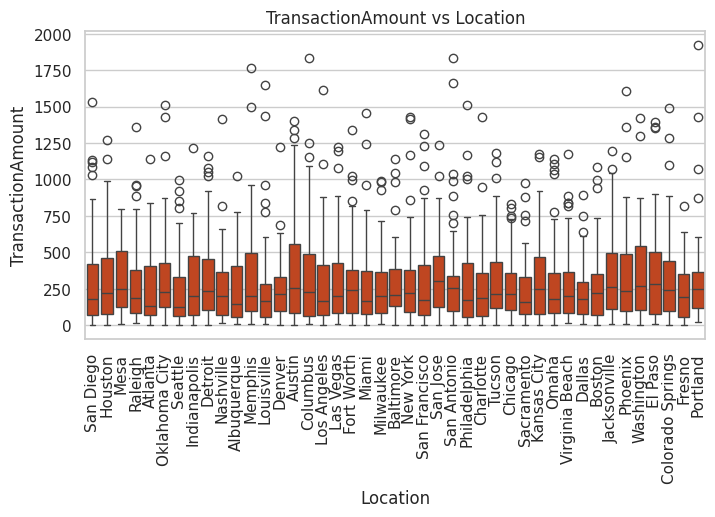

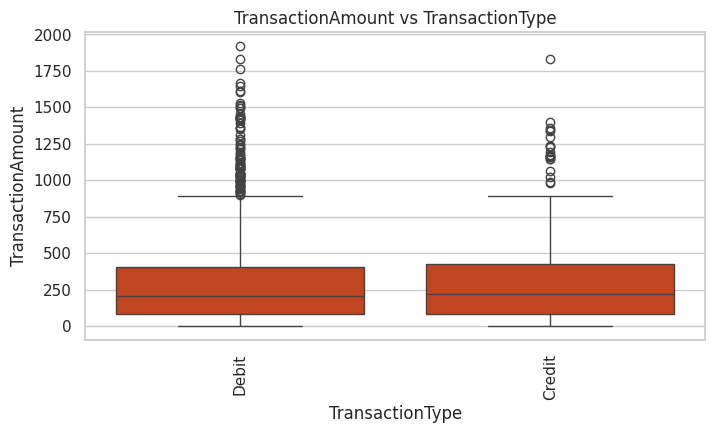

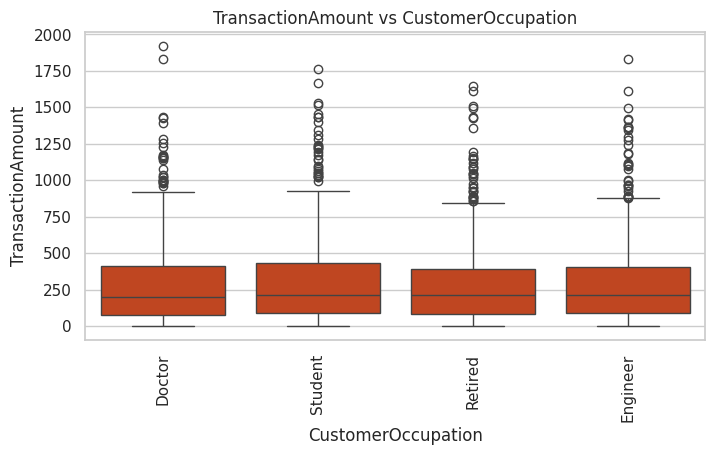

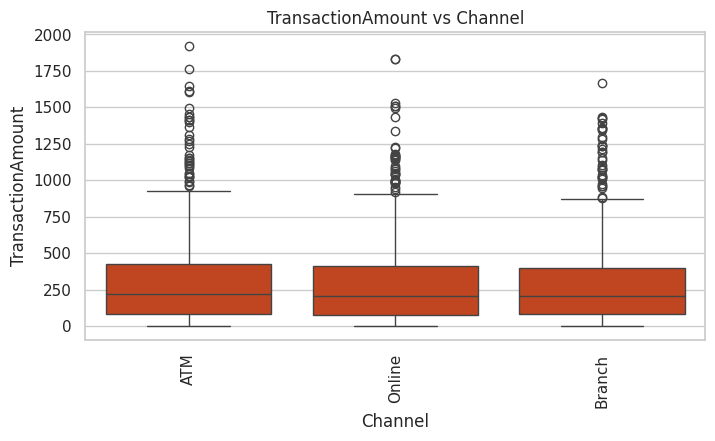

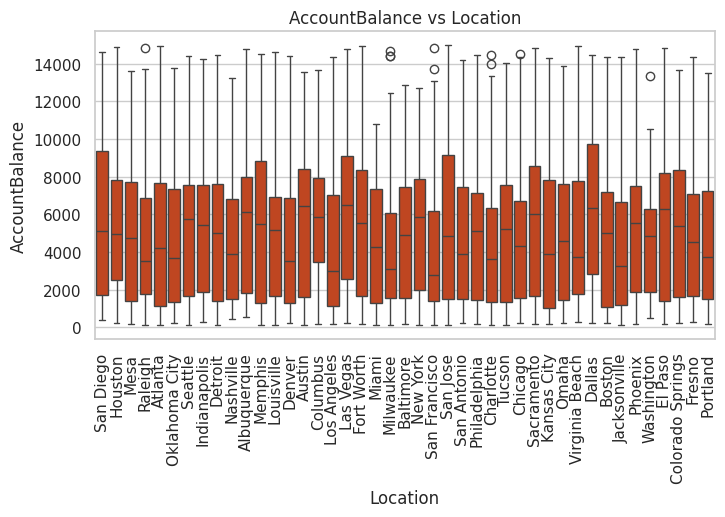

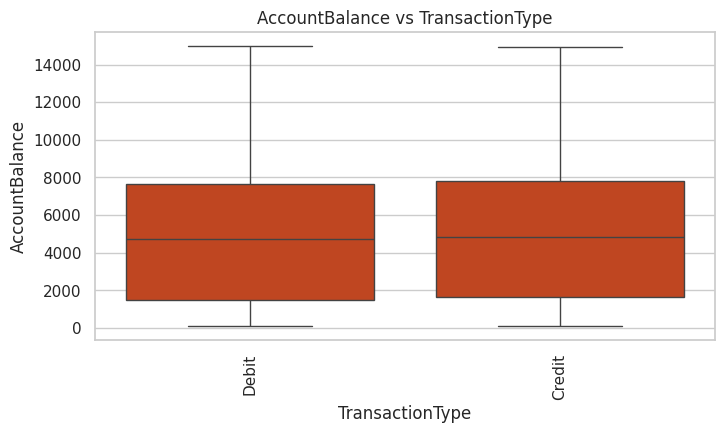

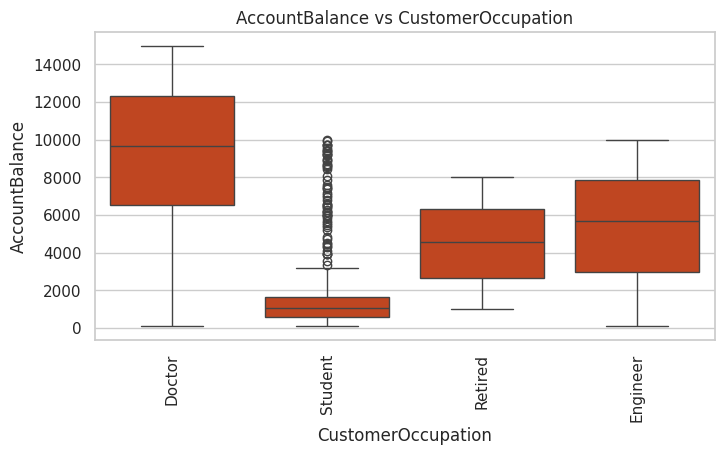

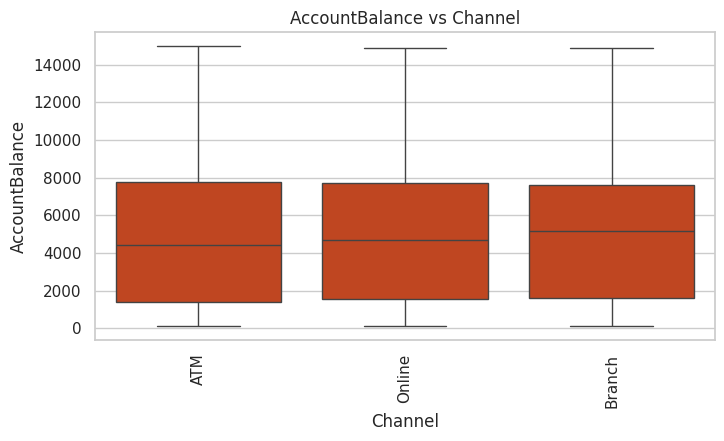

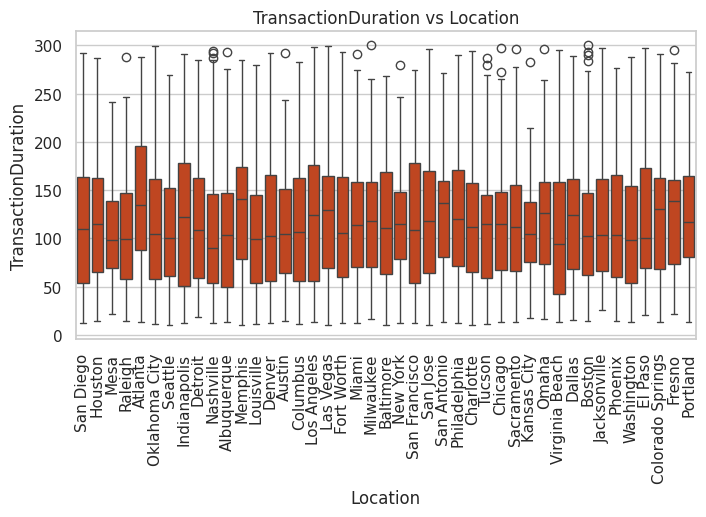

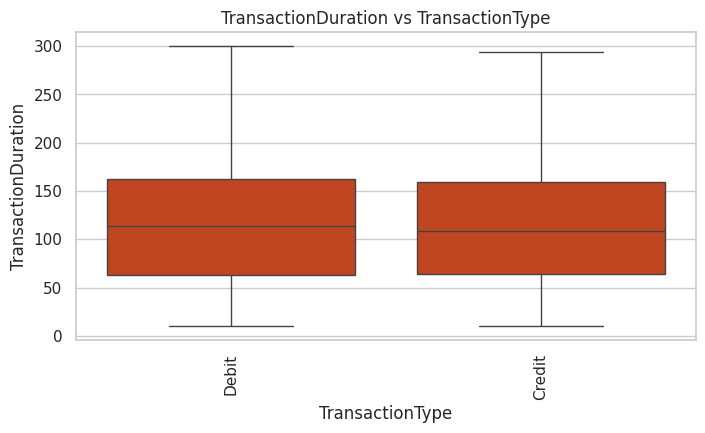

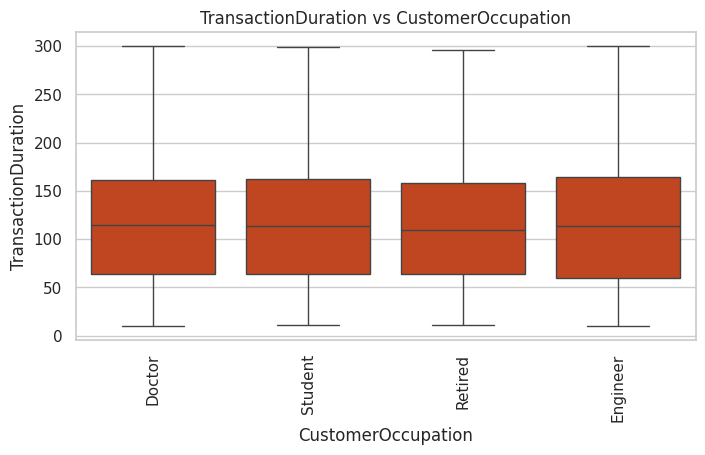

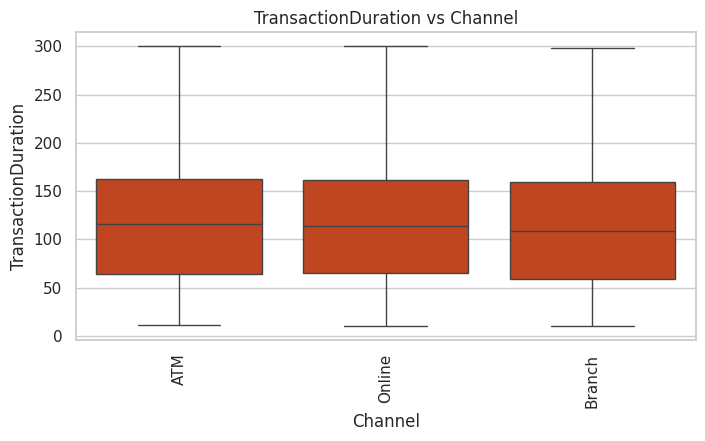

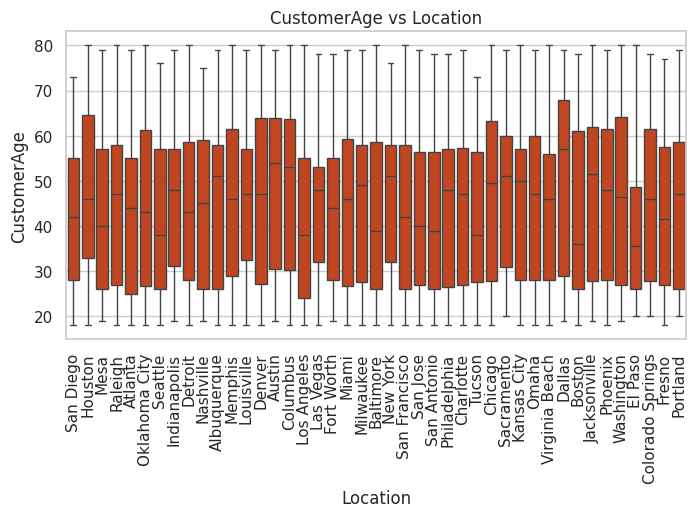

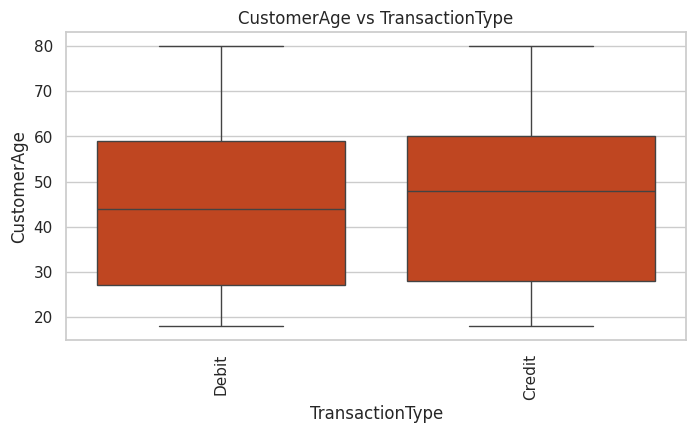

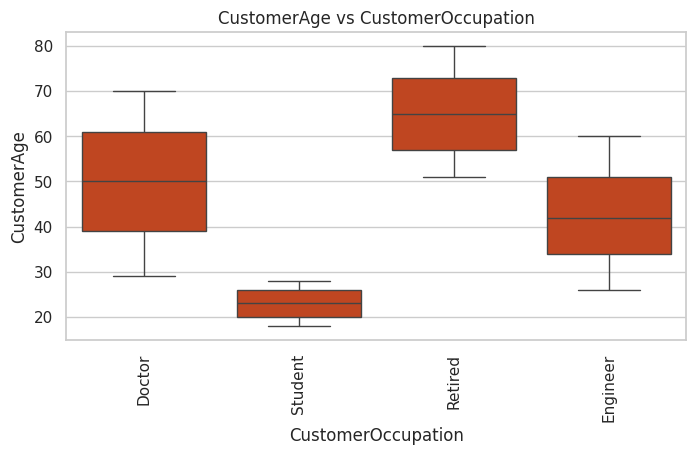

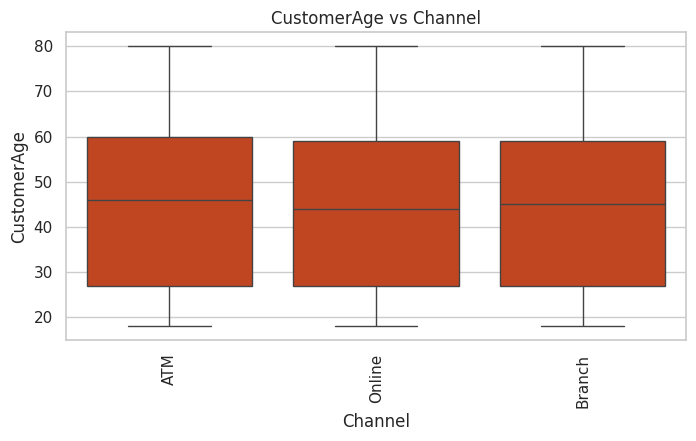

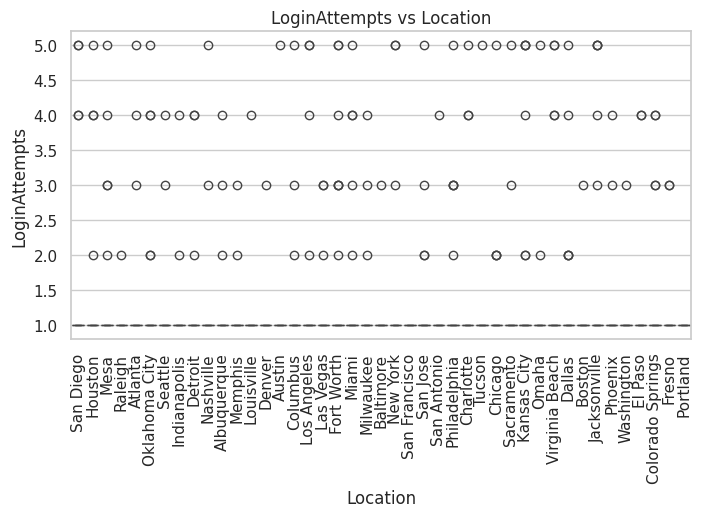

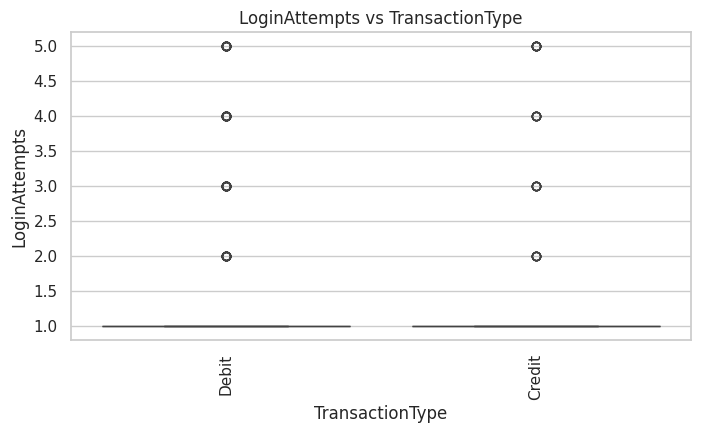

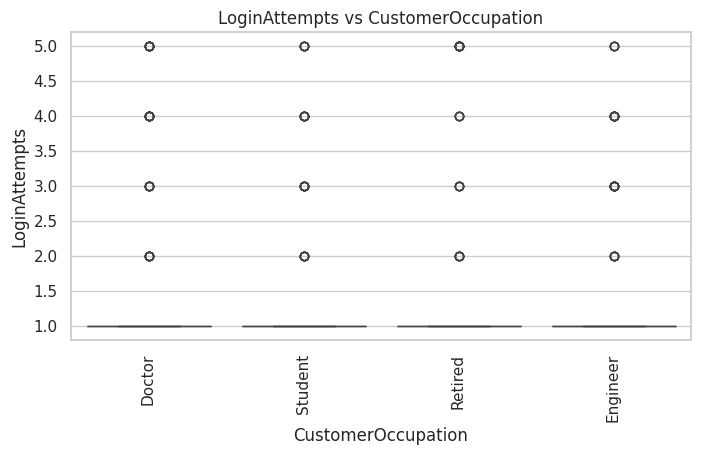

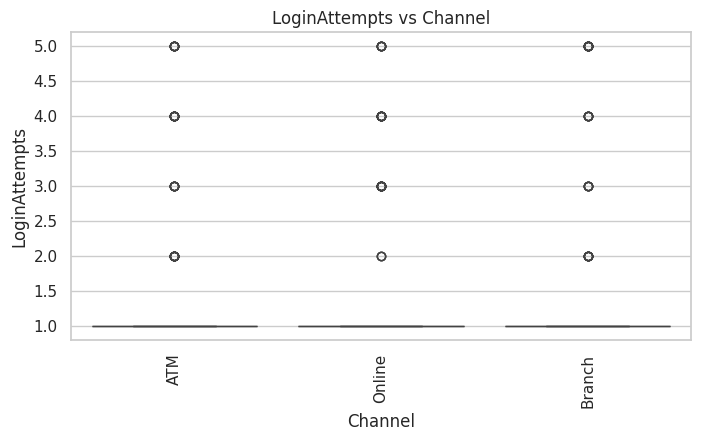

In [87]:
# Numerical and Categorical Analysis over the Columns
#set a colorful style for the plots
sns.set(style='whitegrid', palette='turbo_r')

# creating numerical columns for analysis
numerical_columns = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge', 'LoginAttempts']
# creating categorical columns for analysis
categorical_columns = ['Location', 'TransactionType', 'CustomerOccupation', 'Channel']

for numerical in numerical_columns:
  for categorical in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=categorical, y=numerical, data=dataset)
    plt.title(f'{numerical} vs {categorical}')
    plt.xticks(rotation=90) #rotating x-axis label for better readibility
    plt.xlabel(categorical)
    plt.ylabel(numerical)
    plt.show()


Using box plots, the plots show a comparison of the dataset's numerical and categorical variables.  Through the display of central tendency, spread, and skewness, it aids in the analysis of patterns, trends, and potential outliers by illustrating how the distribution across numerical variables differs across other category features.

 By examining these connections, the research sheds light on how various aspects could be influenced by the interaction.  Visualising more data and model development helps to understand it.

### Further explanation regarding the box plotting distribution shown above:
**TransactionAmount vs Location**

We represent here the visualisation of transaction amount accross different locations which assists us in determinating whether transaction amount are larger or lower in different locations than in others. This part is indicating regional spending patterns or possible fraud risks.


**TransactionAmount vs TransactionType**

In this plot we are identifying how particular transactions are connected to a larger or smaller sums, which might be usefull for spotting fraud risks or understanding customer behavior.

**TranasactionAmount vs CustomerOccupation**

Here we are visualising different transaction amounts accros diferent customer occupations, which are highlighting different spending habbits depends on the occupation clustering. Resulting in knowledge representation in spoofing risks and customer segmentation.

**TransactionAmount vs Channel**

This plot examinate the transaction amounts throughout different channels (e.g. Branch, ATM or Online). This could be useful for security or fraud prevention.

**AccountBalance vs Location**

Box plotting the distribution of account balances across different locations, in which some customers might have higher or lower balances. This potentially could reflect over regional economic factors.

**AccountBalance vs TransactionType**

Account balance distribution over diferent transaction types indicating a certain types have higher impact on account balances such as deposits and withdraws.

**AccountBalance vs CustomerOccupation**

Tee following plot visualise account balances across customer occupation, which identifying insights into customer financial profiles.

**AccountBalance vs Channel**

Examinating customers preferences over channel accessibility depending on customer account with higher or lower balance.

**TransactionDuration vs Location**

The box plotting present the distribution of transaction duration over different locations, where transactions typically are taking longer or shorter time. Indicating security concerns.

**TransactionDuration vs TransactionType**

Presenting transaction duration distribution for different transaction types, which might require longer or shorter proccessing times.

**TransactionDuration vs CustomerOccupation**

It's identifying occupational clustering with transaction durations, reflecting into different usage patterns or technological literacy.

**TransactionDuration vs Channel**

Indicating operational efficiency or technical limitations over transaction duration based on channel usage with longer or shorter processing times.

**CustomerAge vs Location**

The consumer age is displayed in this box plot across different places, representing either a younger or older customer base.

**CustomerAge vs TransactionType**

Different transaction types reveal the age of the customer, indicating that some transactions are more prevalent in a certain age group that is in charge of financial demands or generational preferences.

**CustomerAge vs CustomerOccupation**

This plot can draw attention to age distributions within various occupational categories, offering valuable information for consumer segmentation or workforce planning.

**CustomerAge vs Channel**

Customer age vs Channel could show whether some channels are more well-liked by particular age groups, which could indicate preferences for accessibility or technological adoption.

**LoginAttemps vs Location**

It can detect areas where the frequency of login attempts is abnormally high or low, which may point to suspicious activity or security flaws.

**LoginAttemps vs TransactionType**

The box plotting of loggin attemps vs transaction type it's shows that If specific transaction types are linked to additional login attempts, it may indicate security vulnerabilities or problems with the user experience.

**LoginAttemps vs CustomerOccupation**

This plot can recognise professional groups with different login attempt trends, which may indicate technological competence or security awareness.

**LoginAttempts vs Channel**

Channels with higher or lower login attempt rates may be highlighted, possibly pointing to security flaws or user interfaces unique to a given channel.


## 1.1.4 Model Development and Evaluation

Train and evaluate learning models, e.g., supervised: linear regression, decision trees, and unsupervised: K-means.

Use appropriate evaluation metrics, e.g., R-squared, accuracy, precision, recall, F1-score, etc.

Provide a clear interpretation of the model performance using classification report, tables or graphs.

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report

## K Means for Fraud Detection

Utilize Multi-Dimensional Scaling to scale down features of the dataset primarily for data visualization

In [89]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
reducedCluster = mds.fit_transform(strippedDataset)


Utilize the elbow method to determine the optimal value for K in K-Means Clustering

In [90]:
# Elbow Method for identifying optimal K Value
from scipy.spatial.distance import cdist
distortions = []
inertia = []
K = range(1, 10)
for k in K:
  kMeans = KMeans(n_clusters = k, random_state=42)
  kMeans.fit(reducedCluster)
  distortions.append(sum(np.min(cdist(reducedCluster, kMeans.cluster_centers_, 'euclidean'), axis=1)**2) / reducedCluster.shape[0])
  inertia.append(kMeans.inertia_)



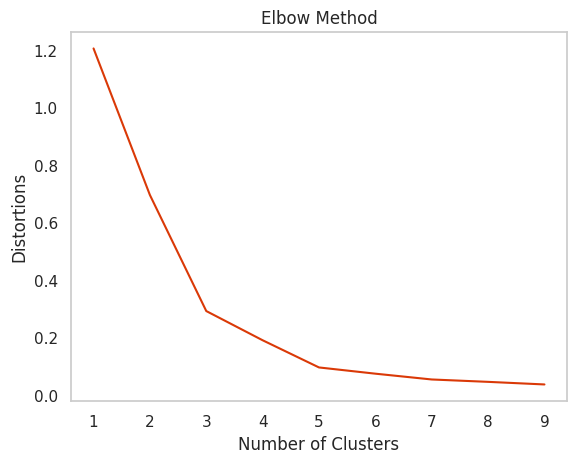

In [91]:
# Plot using distortions
plt.plot(K, distortions)
plt.xlabel("Number of Clusters")
plt.ylabel("Distortions")
plt.title("Elbow Method")
plt.grid()
plt.show()

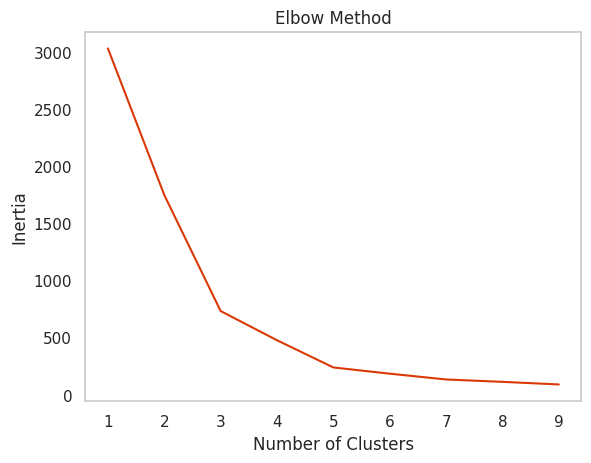

In [92]:
# Plot using inertia
plt.plot(K, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid()
plt.show()

Applies K-Means clustering to the scaled down set of features

In [93]:
fraud_k_means = KMeans(n_clusters = 5, random_state=42)
fraud_k_means.fit(reducedCluster)

strippedDataset['Clustered'] = fraud_k_means.labels_
strippedDataset['ScaledDown'] = reducedCluster.tolist()


Display the Silhouette Score of the clustering. The Silhouette Score measures how similar a data point is to its cluster as well as how separated the cluster is from other clusters. Higher scores indicate better overall clustering results

In [94]:
fraud_silhouette_avg = silhouette_score(reducedCluster, strippedDataset['Clustered'])
print(f"Silhouette Score: {fraud_silhouette_avg}")

Silhouette Score: 0.7203247782484873


Visualization of the clustered groups of datapoints

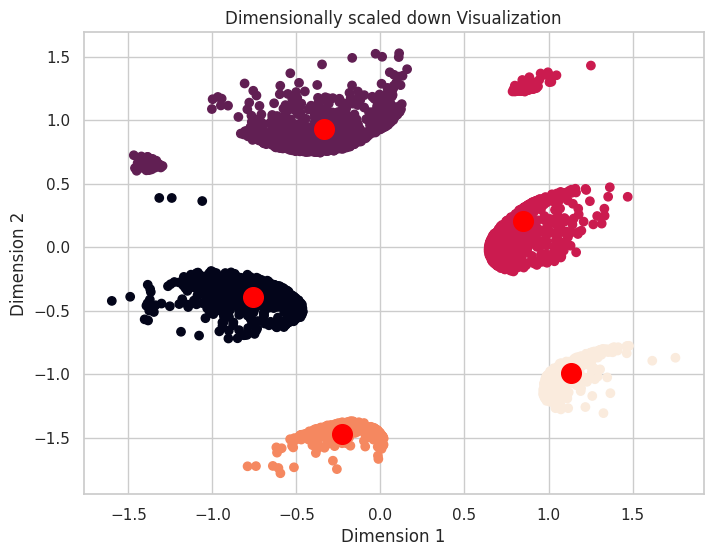

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(reducedCluster[:, 0], reducedCluster[:, 1], c=strippedDataset['Clustered'])
plt.scatter(fraud_k_means.cluster_centers_[:, 0], fraud_k_means.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("Dimensionally scaled down Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## Outlier Identification

Outliers are those specific data entries which fall very far away from the majority of their cluster. These are likely candidates for fraudulent transactions.

Sorting the data points by their distance to their cluster's centroid will show those data points which fall far from the other entries. Comparing these data points distances to the average distance of the points in that cluster to the centroid could be helpful in confirming an outlier.

In [96]:
def getEuclideanDist(ds, centroids):
  clusterGroup = ds['Clustered']
  scaledDown = ds['ScaledDown'].apply(pd.Series).to_numpy()
  centroidLoc = np.array(centroids[clusterGroup])
  distances = []

  for i in range(scaledDown.shape[0]):
    dist = np.linalg.norm(scaledDown[i] - centroidLoc[i])
    distances.append(dist)
  ds['DistanceToCentroid'] = distances


# get the euclidean distance of each point to its cluster's centroid
getEuclideanDist(strippedDataset, fraud_k_means.cluster_centers_)

Cluster Number: 0 and number of outliers 40
Cluster Number: 1 and number of outliers 31
Cluster Number: 2 and number of outliers 13
Cluster Number: 3 and number of outliers 13
Cluster Number: 4 and number of outliers 31


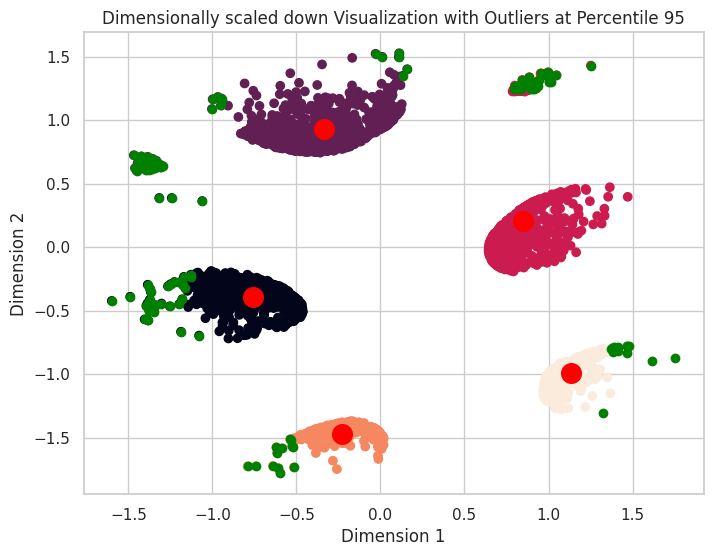

In [112]:
def findOutliers(percentile, ds):
  uniqueClusters = ds['Clustered'].unique()

  outliers = []
  #threshold determines how far from the mean data point distance a data point needs to be to be considered an outlier
  for c in uniqueClusters:
    currentCluster = strippedDataset.loc[strippedDataset['Clustered'] == c]
    thresholdDistance = np.percentile(currentCluster['DistanceToCentroid'], percentile)
    outlierPoint = currentCluster.loc[currentCluster['DistanceToCentroid'] > thresholdDistance]
    outliers.append(outlierPoint)

  for clusterGroup in range(len(outliers)):
    print(f"Cluster Number: {clusterGroup} and number of outliers {len(outliers[clusterGroup])}")
  return outliers

def displayOutliers(percentile, outliers):
  plt.figure(figsize=(8, 6))
  plt.scatter(reducedCluster[:, 0], reducedCluster[:, 1], c=strippedDataset['Clustered'])
  for outlier in outliers:
    outlierArr = outlier['ScaledDown'].apply(pd.Series).to_numpy()
    plt.scatter(outlierArr[:, 0], outlierArr[:, 1], c='green', label='Outliers')
  plt.scatter(fraud_k_means.cluster_centers_[:, 0], fraud_k_means.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
  plt.title("Dimensionally scaled down Visualization with Outliers at Percentile "+str(percentile))
  plt.xlabel("Dimension 1")
  plt.ylabel("Dimension 2")
  plt.show()

percentile_threshold = 95

outliers = findOutliers(percentile_threshold, strippedDataset)
displayOutliers(percentile_threshold, outliers)

# Analyze Clusters

In [132]:
clusters = strippedDataset['Clustered'].unique()
# display information about each cluster and their similarities

for outlier in outliers:
  for i in outlier.index:
    featureColumns = dataset.iloc[[i]]
    display(featureColumns[[ 'AccountBalance', 'TransactionAmount', 'Location', 'CustomerAge', 'TransactionType']])

,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
6,13316.71,7.08,Seattle,37,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
26,673.35,246.93,Miami,23,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
117,5688.37,56.98,Oklahoma City,43,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
380,1122.88,112.05,Phoenix,26,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
410,7095.88,390.35,Omaha,64,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
454,919.84,611.11,Detroit,20,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
543,522.08,552.02,Chicago,44,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
570,5711.71,262.22,Baltimore,40,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
616,2791.12,254.92,San Antonio,28,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
630,5002.7,339.35,Boston,78,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
693,10427.0,733.29,Virginia Beach,52,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
792,2797.26,253.55,Jacksonville,28,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
847,991.69,214.83,Tucson,23,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
850,14851.28,23.4,El Paso,46,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
871,6972.5,154.32,Tucson,38,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
905,1404.06,793.88,Los Angeles,22,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
939,5368.42,214.73,Los Angeles,46,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1028,1305.06,516.47,Charlotte,25,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1051,6039.04,175.21,Mesa,69,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1103,1982.9,350.72,Fresno,28,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1148,614.14,349.34,Indianapolis,28,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1186,3743.63,876.57,Portland,62,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1265,1673.76,595.91,San Antonio,19,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1413,2040.77,362.68,Miami,63,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1491,6266.65,506.26,Baltimore,64,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1584,5335.44,434.17,Atlanta,21,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1618,14829.85,108.75,Houston,50,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1659,6229.36,53.79,Philadelphia,54,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1707,379.82,566.33,Charlotte,24,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1733,868.91,238.54,Indianapolis,19,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1754,269.78,270.54,Sacramento,20,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1775,2006.69,486.61,Sacramento,48,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1783,951.33,292.03,Memphis,46,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2006,11197.54,28.04,Los Angeles,57,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2161,7155.04,10.15,Austin,59,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2193,7927.27,54.91,Columbus,41,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2302,9403.12,106.43,Phoenix,52,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2371,319.18,21.23,Virginia Beach,23,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2376,8586.38,277.02,Denver,46,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2495,6863.02,271.22,Louisville,45,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
113,3528.72,213.76,Dallas,78,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
188,1241.99,10.94,Philadelphia,60,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
209,5959.2,321.79,Raleigh,63,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
235,6736.3,54.03,Milwaukee,56,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
274,323.69,1176.28,Kansas City,54,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
412,1328.73,242.39,San Antonio,18,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
445,7752.14,50.17,Sacramento,77,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
476,2564.62,53.81,Raleigh,55,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
694,296.47,350.15,Fresno,21,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1165,239.12,161.1,Miami,19,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1178,14489.69,752.69,Dallas,65,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1281,1134.79,1397.59,Austin,26,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1358,12500.8,20.62,Philadelphia,35,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1505,5379.25,160.52,Jacksonville,78,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1575,441.54,732.53,San Jose,26,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1577,999.62,67.07,Los Angeles,24,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1635,14304.38,40.12,Dallas,36,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1655,2563.91,410.4,Virginia Beach,61,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1674,13558.56,667.95,Oklahoma City,62,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1773,6269.12,169.97,San Diego,22,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1839,14935.5,813.78,Atlanta,54,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1857,387.02,720.13,Omaha,22,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2019,11989.39,643.02,Detroit,38,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2029,7764.16,885.33,Raleigh,47,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2039,1598.63,477.54,San Francisco,23,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2128,6020.85,18.14,Milwaukee,58,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2166,7370.41,222.96,Fresno,65,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2286,8639.36,110.4,San Diego,56,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2343,3679.64,27.61,Fort Worth,54,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2374,620.28,129.62,San Jose,23,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2409,3896.08,90.94,Colorado Springs,63,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
73,6537.62,233.92,Jacksonville,26,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
288,483.02,242.62,San Francisco,22,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
529,1240.71,1063.25,Omaha,21,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
665,2459.84,152.18,Los Angeles,39,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
691,4815.11,25.94,San Jose,58,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1325,219.53,359.65,Jacksonville,25,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1524,1644.09,43.88,Seattle,26,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1557,12841.01,262.43,San Diego,37,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1677,1779.85,88.06,Raleigh,18,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1976,1490.34,173.13,Atlanta,20,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2013,5828.48,510.7,Nashville,27,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2243,1400.04,347.63,Chicago,25,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2310,7132.08,176.52,San Diego,73,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
34,14815.87,255.26,San Francisco,45,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
372,13964.31,157.37,Dallas,42,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
508,431.16,127.0,Nashville,19,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
588,4708.29,178.88,Dallas,76,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
953,2596.61,119.95,Philadelphia,62,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
961,1822.34,353.59,New York,52,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1015,14847.97,285.18,Sacramento,55,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1213,7816.41,1192.2,Jacksonville,60,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1283,745.87,170.19,Los Angeles,27,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1625,6601.5,1360.01,Phoenix,67,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1703,9927.75,1294.81,Washington,45,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1996,5399.76,14.16,Oklahoma City,74,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2073,13704.92,441.26,Tucson,58,Credit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
52,14904.9,85.43,Virginia Beach,67,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
146,2042.22,973.39,Sacramento,77,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
153,12904.66,496.03,San Francisco,61,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
190,5674.32,1422.55,Washington,79,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
231,14804.7,705.6,Phoenix,40,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
375,13347.69,1392.54,El Paso,41,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
394,7697.68,6.3,Columbus,80,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
414,1749.79,83.5,Dallas,61,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
605,5757.67,7.31,Las Vegas,78,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
681,8885.0,499.99,San Jose,31,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
685,319.04,119.3,Mesa,34,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
772,9800.21,827.14,El Paso,36,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
878,9257.04,1108.46,Los Angeles,30,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
898,859.86,1531.31,San Diego,18,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
909,13566.58,120.86,Colorado Springs,33,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1042,816.01,180.65,Charlotte,22,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1057,6704.76,83.07,Miami,27,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1121,1590.88,303.97,Fort Worth,24,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1136,1442.29,341.67,Omaha,53,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1254,524.46,142.19,Houston,18,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1363,5117.03,204.7,Oklahoma City,49,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1428,964.79,11.02,Tucson,19,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1556,1265.27,170.97,Nashville,26,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1641,12815.24,50.52,Los Angeles,54,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1731,5684.09,1.93,Chicago,47,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1774,2281.9,17.79,Jacksonville,61,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
1801,13054.54,331.32,Sacramento,61,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2159,4976.18,624.0,Houston,26,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2262,8384.85,15.81,Oklahoma City,69,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2330,12072.11,69.38,Detroit,69,Debit


,AccountBalance,TransactionAmount,Location,CustomerAge,TransactionType
2414,1588.31,1664.33,San Antonio,18,Debit


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## 1.1.5 Ethical Considerations


Highlight potential biases or fairness issues in the dataset or models.

Suggest practical strategies for mitigating these ethical challenges.

# Natural Language Processing and Deep Learning Coursework Part 2

Import dataset for use in Natural Language Processing

In [98]:
nlp_dataset = pd.read_csv("/content/drive/MyDrive/CST3133_CW/datasets/IMDB Dataset.csv")
print(nlp_dataset.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [99]:
print(nlp_dataset.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [100]:
print(nlp_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [101]:
print()

## 1.2.1 Text Dataset Selection and Preprocessing


Checking for Missing Values

Select a publicly available text dataset, for example, IMDb reviews, Amazon product reviews, AG News, depending
on what you want to achieve.

Preprocess the dataset, for example, clean text, tokenize, remove stopwords, etc.

Use pre-trained embeddings, e.g., GloVe, Word2Vec for feature representation.

print(nlp_dataset.isnull().sum())
print(nlp_dataset.isnull().sum().sum())

In [102]:
print(nlp_dataset['sentiment'].unique())

['positive' 'negative']


WORKING HERE TO REMOVE DUPLICATES

In [103]:
#
nlp_dataset.duplicated(subset='review').sum()


418

In [104]:
nlp_data = []
for index, row in nlp_dataset.iterrows():
  nlp_data.append([row['review'], row['sentiment']])

In [105]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(review):
  # Turning all the review to lower case
  review = review.lower()
  # Removing all the HTML
  review = re.sub(r'<.*?>', '', review)
  # Removing all non-alphanumeric characters except spaces
  review = re.sub(r'[^a-zA-Z0-9]', ' ', review)
  # Tokenising the words
  tokens = word_tokenize(review)
  # Removing the stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  # Applying lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return " " .join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [106]:
nlp_tokenised_reviews = []
nlp_one_hot_encoded_sentiments = []

for index, row in nlp_dataset.iterrows():
  nlp_tokenised_reviews.append(preprocess_text(row['review']))
  nlp_one_hot_encoded_sentiments.append( 1 if row['sentiment'] == 'positive' else 0)

print(nlp_tokenised_reviews[:5])
print(nlp_one_hot_encoded_sentiments[:5])

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


## 1.2.2 Deep Learning Model Implementation


Design and train a neural network, e.g., RNN, LSTM for a text-based task, e.g., sentiment analysis.

Clearly explain the model architecture, e.g., embedding layers, hidden layers, activation functions, and
hyperparameter tuning

## 1.2.3 Evaluation and Insights


Use evaluation metrics, e.g., accuracy, precision, recall, loss curves.

Provide visualizations, e.g., learning curves, confusion matrices, to explain findings, where possible.

Highlight strengths, limitations and areas for improvement.